In [1]:
import os
import sys
sys.path.append("../../")
from imp import reload

import Reader
import toolkit
import visualization
# import GearboxFaultDetector
import model_entry

Using TensorFlow backend.
D:\Software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# reload(Reader)

In [3]:
feature_path = r"D:/Workspace/python_workspace/gearbox-fault-detection/local/feature/li_niu_ping/"
speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\li_niu_ping"
wind_turbine = "7"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [4]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)
feature = feature.loc[speed.index]
toolkit.print_shape(feature=feature)

feature.shape: (2743, 75)


array([[<AxesSubplot:title={'center':'speed'}>]], dtype=object)

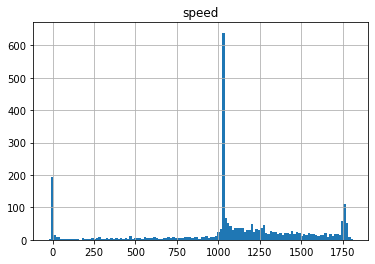

In [5]:
speed.hist(bins=128)

feature.shape: (2475, 75)
speed.shape: (2475, 1)


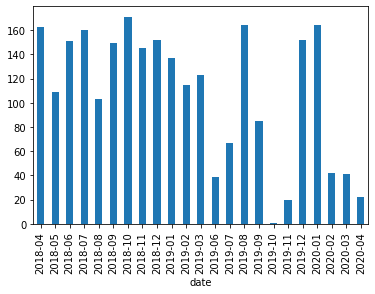

In [6]:
speed_threshold = 250
feature = feature[speed.speed >= speed_threshold]
speed = speed[speed.speed >= speed_threshold]

toolkit.print_shape(feature=feature, speed=speed)

visualization.data_distribution(feature)

In [16]:
# 划分train set, test set
train_start = "2018-04"
train_end = "2019-07"

test_start = "2019-08"
test_end = "2020"

feature_train = feature[train_start: train_end]
# speed_train = speed[train_start: train_end]

feature_test = feature[test_start: test_end]
# speed_test = speed[test_start: test_end]

toolkit.print_shape(feature_train=feature_train, feature_test=feature_test)

feature_train.shape: (1784, 75)
feature_test.shape: (691, 75)


In [8]:
# feature_test = feature
# speed_test = speed

In [9]:
detector = model_entry.OutlierDetector()

In [10]:
detector.fit(feature_train)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.











<AxesSubplot:xlabel='date'>

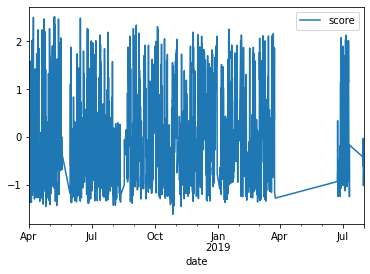

In [11]:
detector.decision_scores.plot()

In [12]:
anomaly_scores = detector.decision_function(feature_test)

<AxesSubplot:xlabel='date'>

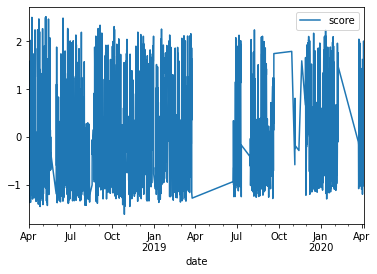

In [13]:
anomaly_scores.plot()

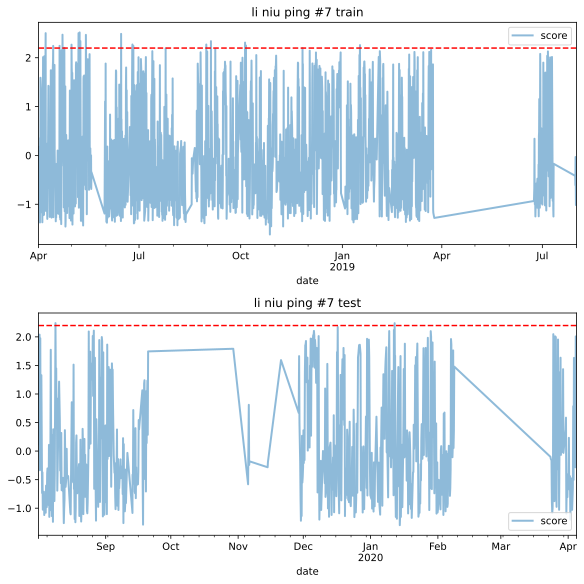

In [17]:
anomaly_scores_train = detector.decision_scores
label_train = detector.label
# 测试
anomaly_scores_test = detector.decision_function(feature_test)
label_test = detector.predict(feature_test)
fig, ax = visualization.plot_line(anomaly_scores_train, label_train,
    anomaly_scores_test, label_test, detector.threshold, "li niu ping", 
    wind_turbine)

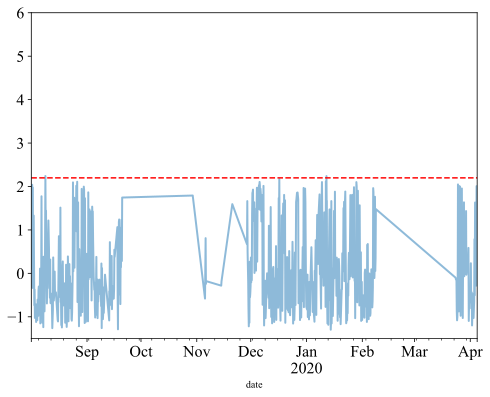

In [21]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',  # 设置字体类型
}
rcParams.update(config)

visualization.set_figsize(figsize=(8, 6))
fig, ax = plt.subplots()
anomaly_scores_test.plot(ax=ax, linewidth=2, alpha=0.5, legend=False, fontsize=16, ylim=(-1.5, 6))
ax.plot(anomaly_scores_test.index, [detector.threshold] * len(anomaly_scores_test), "r--", label="threshold")
ax.scatter(x=anomaly_scores_test[label_test.label].index, y=anomaly_scores_test[label_test.label], c="r")


In [23]:
feature_train

gearbox                                                 \
                          mean        sd      root       rms   peak  skewness   
date                                                                            
2018-04-01 00:00 -7.553101e-07  0.044105  0.029734  0.044105  0.201  0.006777   
2018-04-01 04:00  1.754761e-07  0.292388  0.195084  0.292388  1.399 -0.086482   
2018-04-01 16:00 -6.065369e-07  0.036891  0.024845  0.036891  0.180 -0.031148   
2018-04-01 20:00 -5.302429e-07  0.090957  0.063889  0.090957  0.351  0.009376   
2018-04-02 00:00 -1.296997e-07  0.286643  0.191859  0.286642  1.673 -0.072287   
...                        ...       ...       ...       ...    ...       ...   
2019-07-31 01:00  7.629395e-09  1.234652  0.851252  1.234650  4.694  0.053709   
2019-07-31 05:00  2.632141e-07  0.083617  0.055822  0.083617  1.889  0.017173   
2019-07-31 09:00 -2.250671e-07  0.111088  0.073524  0.111088  0.737  0.053260   
2019-07-31 13:00  3.204346e-07  0.101662  0.067658  0.101662  0.544  0.028903   
2019-07-31 21:00  8.659363e-07  0.544914  0.365862  0.544913  2.560 -0.069997   

                                                            ...  \
                  kurtosis      crest  clearance     shape  ...   
date                                                        ...   
2018-04-01 00:00  0.036190   4.557303   6.759976  1.254691  ...   
2018-04-01 04:00  0.149690   4.784744   7.171272  1.263887  ...   
2018-04-01 16:00  0.048382   4.879201   7.244882  1.255122  ...   
2018-04-01 20:00 -0.393561   3.858959   5.493924  1.223381  ...   
2018-04-02 00:00  0.137952   5.836547   8.719925  1.261362  ...   
...                    ...        ...        ...       ...  ...   
2019-07-31 01:00 -0.285524   3.801887   5.514229  1.236801  ...   
2019-07-31 05:00  4.088519  22.591157  33.839717  1.266309  ...   
2019-07-31 09:00  0.407933   6.634395  10.023904  1.271210  ...   
2019-07-31 13:00  0.218117   5.351068   8.040408  1.265905  ...   
2019-07-31 21:00  0.004455   4.697997   6.997182  1.257715  ...   

                 high_speed_shaft                                       \
                               p5         p6           p7           p8   
date                                                                     
2018-04-01 00:00       972.369767   9.931803  1227.104084  1892.574734   
2018-04-01 04:00      1114.317945  21.458783  1287.153990  1753.865558   
2018-04-01 16:00       990.175323   8.831005  1243.522652  1903.280593   
2018-04-01 20:00       919.524192  11.827005  1171.447980  1864.286651   
2018-04-02 00:00      1101.019969  22.191116  1279.033928  1755.296190   
...                           ...        ...          ...          ...   
2019-07-31 01:00      1223.023927  38.462361  1357.554239  1725.141467   
2019-07-31 05:00       895.114800  13.563672  1139.257689  1846.728009   
2019-07-31 09:00       977.624713  16.413678  1195.499230  1808.404155   
2019-07-31 13:00       951.151680  15.582738  1178.930653  1819.044210   
2019-07-31 21:00      1204.571386  27.082430  1356.539234  1769.111824   

                                                                         \
                        p9       p10        p11           p12       p13   
date                                                                      
2018-04-01 00:00  0.648378  0.010214  33.671690  10716.146939  0.001370   
2018-04-01 04:00  0.733895  0.019257   2.964137   1802.366493  0.005284   
2018-04-01 16:00  0.653358  0.008919  35.762608  13673.496517  0.001137   
2018-04-01 20:00  0.628363  0.012862  35.450646   7734.062211  0.001854   
2018-04-02 00:00  0.728671  0.020155   3.335362   1682.842416  0.005503   
...                    ...       ...        ...           ...       ...   
2019-07-31 01:00  0.786923  0.031449  -2.161763    531.467978  0.013886   
2019-07-31 05:00  0.616906  0.015153  34.646081   6139.649956  0.002342   
2019-07-31 09:00  0.661080  0.016789  19.334868   3589.487156  0.003259   
2019-07-31 1

In [24]:
feature_test

gearbox                                        \
                          mean        sd      root       rms    peak   
date                                                                   
2019-08-01 01:00 -2.174377e-07  1.450079  0.977051  1.450077   4.976   
2019-08-01 05:00  3.356934e-07  1.208115  0.816496  1.208112   4.927   
2019-08-01 13:00  1.335144e-07  1.758243  1.181499  1.758240   7.070   
2019-08-01 17:00 -6.065369e-07  0.655750  0.434137  0.655749   3.369   
2019-08-01 21:00  4.959106e-08  4.144562  3.078759  4.144555  14.739   
...                        ...       ...       ...       ...     ...   
2020-04-04 04:00  4.615784e-07  0.874671  0.573434  0.874670   4.012   
2020-04-04 08:00  3.356934e-07  0.740551  0.480981  0.740549   3.819   
2020-04-04 12:00  1.068115e-06  1.586310  1.063539  1.586307   7.608   
2020-04-04 16:00  2.670288e-07  0.919208  0.546446  0.919206   5.136   
2020-04-04 20:00  2.288818e-07  1.051614  0.599759  1.051612   8.864   

                                                                     ...  \
                  skewness  kurtosis     crest  clearance     shape  ...   
date                                                                 ...   
2019-08-01 01:00  0.043781 -0.334167  3.431543   5.092877  1.249863  ...   
2019-08-01 05:00  0.005136 -0.077367  4.078263   6.034321  1.252212  ...   
2019-08-01 13:00  0.091212 -0.060792  4.021067   5.983922  1.256621  ...   
2019-08-01 17:00  0.071120  0.315049  5.137640   7.760218  1.270652  ...   
2019-08-01 21:00  0.009857 -0.735900  3.556233   4.787318  1.185156  ...   
...                    ...       ...       ...        ...       ...  ...   
2020-04-04 04:00  0.007539  0.366310  4.586874   6.996445  1.277766  ...   
2020-04-04 08:00  0.242929  0.617065  5.156982   7.940029  1.286588  ...   
2020-04-04 12:00 -0.101977  0.114804  4.796046   7.153477  1.260140  ...   
2020-04-04 16:00  0.011401  1.809034  5.587430   9.398922  1.360938  ...   
2020-04-04 20:00 -0.072419  3.998169  8.428965  14.779269  1.408203  ...   

                 high_speed_shaft                                       \
                               p5         p6           p7           p8   
date                                                                     
2019-08-01 01:00      1328.381817  33.795078  1463.207510  1804.365723   
2019-08-01 05:00      1305.009143  43.021496  1428.912612  1743.564359   
2019-08-01 13:00      1466.999669  54.552650  1554.512910  1760.223063   
2019-08-01 17:00      1197.720125  36.958875  1358.079714  1790.899672   
2019-08-01 21:00      1233.467396  56.215476  1369.143380  1782.886731   
...                           ...        ...          ...          ...   
2020-04-04 04:00      1214.212196  43.592347  1372.718423  1799.440609   
2020-04-04 08:00      1213.613397  36.770184  1366.486160  1781.112460   
2020-04-04 12:00      1477.980844  51.650162  1559.418733  1754.697742   
2020-04-04 16:00      1256.811151  39.843822  1395.309820  1766.274816   
2020-04-04 20:00      1279.905810  48.433641  1409.467582  1746.373747   

                                                                      \
                        p9       p10       p11         p12       p13   
date                                                                   
2019-08-01 01:00  0.810926  0.025441 -6.558719  732.770575  0.011056   
2019-08-01 05:00  0.819535  0.032966 -5.623787  435.675261  0.016480   
2019-08-01 13:00  0.883134  0.037187 -9.435871  305.165362  0.029130   
2019-08-01 17:00  0.758323  0.030858 -0.109602  603.667055  0.012078   
2019-08-01 21:00  0.767936  0.045575  1.237782  268.097445  0.023166   
...                    ...       ...       ...         ...       ...   
2020-04-04 04:00  0.762858  0.035902 -0.364279  426.524343  0.015525   
2020-04-04 08:00  0.767209  0.030298 -0.663522  591.616472  0.012242   
2020-04-04 12:00  0.888711  0.034946 -9.879759  333.182347  0.028141   
2020-04-04 16:00  0.789973  0.031702 -2.603195  